# Данные

In [0]:
!wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv

--2019-06-10 02:44:38--  https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv [following]
--2019-06-10 02:44:43--  https://www.dropbox.com/s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc682136f147effb6cd4fe7828ba.dl.dropboxusercontent.com/cd/0/inline/AiiWo2q3JVQJUde4P9YXoEKJpNEOydVX9oBWPfs8jrPGeTZPjTI_uAqHHfT4puX37JxkDcQVyzspXgLQjoIc4kdmYuoTU-3S6nJEeiOtOdN6vQ/file# [following]
--2019-06-10 02:44:43--  https://uc682136f147effb6cd4fe7828ba.dl.dropboxusercontent.com/cd/0/inline/AiiWo2q3JVQJUde4P9YXoEKJpNEOydVX9oBWPfs8jrPGeTZPjTI_uAqHHfT4puX37JxkDcQVyzspXgLQjoIc4kdmYuoTU-3S

In [0]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', usecols = ['text', 'source'])
df.head(5)

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


# Домашнее задание

В этом домашнем задании вы будете решать задачу тематической классификации. Даны тексты, опубликованные в нескольких пабликах VK.com, посвященных государственным и муниципальным службам. Формально задача заключается в том, чтобы по тексту ($d$) определить в каком паблике он опубликован, то есть, к какому классу $c$ он принадлежит. 

## Задание 1 [1 балл]. Описательные статистики
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

In [0]:
import pandas as pd
import pymystem3
import re
from nltk.corpus import stopwords
from string import punctuation
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
import collections
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier


morph = MorphAnalyzer()
m = pymystem3.Mystem()
morph = MorphAnalyzer()
import nltk
nltk.download('stopwords')
stops = set(stopwords.words('russian'))
punct = punctuation+'«»—…“”*№–'

     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 7.1MB 487kB/s 


Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [0]:
print('количество текстов - ', len(df))
print('количество классов - ',len(df.source.unique()))

количество текстов -  11526
количество классов -  4


In [0]:
def norm(text):    
    
    words = [word.strip(punct) for word in text.split()]
    return words

def stops(text):
    
    words = [morph.parse(word)[0].normal_form for word in text]
    return words
  
df['text'] = df['text'].apply(lambda x: re.sub('<br>', '', x))

In [0]:
df['text'] = df['text'].apply(lambda x: norm(x))
df['count'] = df['text'].apply(lambda x: len(x))
df['lemmatized'] = df['text'].apply(lambda x: stops(x))

In [0]:
lem = set()
for i in df['lemmatized']:
    lem.update(i)
print('количесвто слов в лемматизированном тексте - ',len(lem))

obj = set()
for i in df['text']:
    obj.update(i)
print('количество слов в имходном тексте - ',len(obj))

количесвто слов в лемматизированном тексте -  48245
количество слов в имходном тексте -  101500


In [0]:
print('средняя длина текста - ',df['count'].mean())
df['symbols'] = df['text'].apply(lambda x: len(' '.join(x)))
print('средняя длина в символах - ',df['symbols'].mean())

средняя длина текста -  84.09682457053619
средняя длина в символах -  649.9982647926428


In [0]:
from collections import Counter 
mchs = []
for text in df[df['source'] == 'mchsgov']['lemmatized']:
    for word in text:
        w = morph.parse(word)[0]
        if w.tag.POS == 'NOUN':
            mchs.append(word)

c = Counter(mchs)
c.most_common(5)

[('мчс', 3489),
 ('россия', 1598),
 ('мчсроссия', 1218),
 ('спасатель', 613),
 ('год', 508)]

In [0]:
mil = []
for text in df[df['source'] == 'mil']['lemmatized']:
    for word in text:
        w = morph.parse(word)[0]
        if w.tag.POS == 'NOUN':
            mil.append(word)

c = Counter(mil)
c.most_common(5)

[('военный', 2029),
 ('минобороны', 1354),
 ('россия', 1289),
 ('год', 1273),
 ('оборона', 914)]

In [0]:
mospolice = []
for text in df[df['source'] == 'mospolice']['lemmatized']:
    for word in text:
        w = morph.parse(word)[0]
        if w.tag.POS == 'NOUN':
            mospolice.append(word)

c = Counter(mospolice)
c.most_common(5)

[('полиция', 5827),
 ('год', 5212),
 ('москва', 4160),
 ('мвд', 4154),
 ('россия', 3976)]

In [0]:
russianpost = []
for text in df[df['source'] == 'russianpost']['lemmatized']:
    for word in text:
        w = morph.parse(word)[0]
        if w.tag.POS == 'NOUN':
            russianpost.append(word)

c = Counter(russianpost)
c.most_common(5)

[('почта', 3143),
 ('россия', 2585),
 ('год', 2075),
 ('отделение', 1583),
 ('письмо', 1452)]

Разделите коллекцию текстов на обучающую и тестовую части. 

In [0]:
df['final'] = df['text'].apply(lambda x: ' '.join(x))
df['lemmatized'] = df['lemmatized'].apply(lambda x: ' '.join(x))
df.drop('count', axis=1, inplace=True)
df.drop('symbols', axis=1, inplace=True)
df = shuffle(df)
train, test = train_test_split(df, test_size=0.2)
train.head() #перемешивание данных и разбиение на тренировочную и тестовую части

,text,source,lemmatized,final
2849,"[Марш, мотострелковых, подразделений, ЗВО, в, ...",mil,марш мотострелковый подразделение зво в белгор...,Марш мотострелковых подразделений ЗВО в Белгор...
10308,"[Полицейские, задержали, подозреваемых, в, хул...",mospolice,полицейский задержать подозревать в хулиганств...,Полицейские задержали подозреваемых в хулиганс...
2545,"[Приоритетным, направлением, новой, государств...",mil,приоритетный направление новый государственный...,Приоритетным направлением новой государственно...
8326,"[Информационное, сообщениеВ, целях, обеспечени...",russianpost,информационный сообщений цель обеспечение почт...,Информационное сообщениеВ целях обеспечения по...
5865,"[Горноспасатели, задействованные, в, спасатель...",mchsgov,горноспасатель задействовать в спасательный оп...,Горноспасатели задействованные в спасательной ...


 ## Задание 2 [2 балла]. Классификация по правилам
 
 * Разработайте несколько правил вида "Если встречается слово $w$, то текст относится к паблику $c$"
 * Посчитайте, какую точность, полноту, $f$-меру и $accuracy$ вы получаете при классификации по правилам
 * Получилось ли у вас придумать правило, которое никогда не ошибается?

In [0]:
def classification(text):
    mch = 'мчс'
    mil = 'военный'
    mospolice = 'полиция'
    russianpost = 'почта'
    if mch in text:
        return 'mchsgov'
    elif mospolice in text:
        return 'mospolice'
    elif mil in text:
        return 'mil'
    elif russianpost in text:
        return 'russianpost'
    else:
        return 'mchsgov' 

In [0]:
df['class'] = df.lemmatized.apply(classification)

In [0]:
print("Precision: {0:6.2f}".format(precision_score(df['source'], df['class'], average='macro')))
print("Recall: {0:6.2f}".format(recall_score(df['source'], df['class'], average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(df['source'], df['class'], average='macro')))
print("...")
print("Precision: {0:6.2f}".format(precision_score(df['source'], df['class'], average='micro')))
print("Recall: {0:6.2f}".format(recall_score(df['source'], df['class'], average='micro')))
print("F1-measure: {0:6.2f}".format(f1_score(df['source'], df['class'], average='micro')))
print("...")
print("Accuracy: {0:6.2f}".format(accuracy_score(df['source'], df['class'])))

Precision:   0.83
Recall:   0.69
F1-measure:   0.68
...
Precision:   0.69
Recall:   0.69
F1-measure:   0.69
...
Accuracy:   0.69


Классификатор по самому встечаемому слову, не покзал удовлетворительного качества, слишком простой

## Задание 3 [3 балла]. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
vectorizer = CountVectorizer(ngram_range=(1,1))  
tfidf = TfidfTransformer()  
classifier = RandomForestClassifier()  

clf = Pipeline([
    ('vect', vectorizer),
    ('tf-idf', tfidf),
    ('clf', classifier),
])

clf.fit(train.final, train.source)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [0]:
test['tags_1'] = clf.predict(test['final'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
print("Precision: {0:6.2f}".format(precision_score(test['source'], test['tags_1'], average='macro')))
print("Recall: {0:6.2f}".format(recall_score(test['source'], test['tags_1'], average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(test['source'], test['tags_1'], average='macro')))
print("...")
print("Precision: {0:6.2f}".format(precision_score(test['source'], test['tags_1'], average='micro')))
print("Recall: {0:6.2f}".format(recall_score(test['source'], test['tags_1'], average='micro')))
print("F1-measure: {0:6.2f}".format(f1_score(test['source'], test['tags_1'], average='micro')))
print("...")
print("Accuracy: {0:6.2f}".format(accuracy_score(test['source'], test['tags_1'])))

Precision:   0.95
Recall:   0.95
F1-measure:   0.95
...
Precision:   0.95
Recall:   0.95
F1-measure:   0.95
...
Accuracy:   0.95


Результаты значительно превзошли классификатор, основанный н аправилах, визуализация представлена ниже:

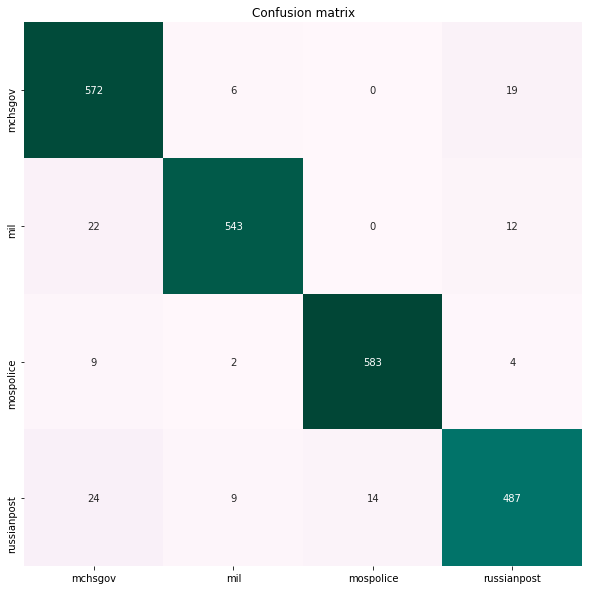

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(test['source'], test['tags_1']), annot=True, fmt="d", cbar=False, xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="PuBuGn")
plt.title("Confusion matrix")
plt.show()

## Задание 4 [2 балла]. Снижение размерности
Добавьте в ваш ```sklearn.pipeline```  методы снижения размерности:  PCA / LSI / LSA / LDA / другое. Какие методы классификации разумно использовать после снижения размерности? Как изменились результаты классификации после добавления нового шага?

In [0]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
tfidf = TfidfTransformer()
lsa = TruncatedSVD(n_components=100)
normalizer = StandardScaler()
classifier = GradientBoostingClassifier()

clf = Pipeline([
    ('vect', vectorizer),
    ('tf-idf', tfidf),
    ('red_dim', lsa),
    ('norm', normalizer),
    ('class', classifier),
])

clf.fit(train.final, train.source)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            

In [0]:
test['tags_2'] = clf.predict(test['final'])

In [0]:
print("Precision: {0:6.2f}".format(precision_score(test['source'], test['tags_2'], average='macro')))
print("Recall: {0:6.2f}".format(recall_score(test['source'], test['tags_2'], average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(test['source'], test['tags_2'], average='macro')))
print("...")
print("Precision: {0:6.2f}".format(precision_score(test['source'], test['tags_2'], average='micro')))
print("Recall: {0:6.2f}".format(recall_score(test['source'], test['tags_2'], average='micro')))
print("F1-measure: {0:6.2f}".format(f1_score(test['source'], test['tags_2'], average='micro')))
print("...")
print("Accuracy: {0:6.2f}".format(accuracy_score(test['source'], test['tags_2'])))

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


После добавления снижения размерноси был также добавлен шаг с нормализацией, метод классификации - по прежнему градиентный бустинг, показатели точности, полноты, F-меры повысились на 0.01, итог-качество немного улучшилось

## Задание 5 [1 балл]. Лемматизация
Посмотрите, как влияет лемматизация на качество классификации. Как изменится качество классификации, если вы используете ```CountVectorizer``` на словах или $n$-граммах на лемматизированных текстах?

In [0]:
df['lemmatized'] = df['lemmatized'].apply(lambda x: ' '.join(x))
train['lemmatized'] = train['lemmatized'].apply(lambda x: ' '.join(x))
test['lemmatized'] = test['lemmatized'].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
tfidf = TfidfTransformer()
lsa = TruncatedSVD(n_components=100)
normalizer = StandardScaler()
classifier = GradientBoostingClassifier()

clf = Pipeline([
    ('vect', vectorizer),
    ('tf-idf', tfidf),
    ('red_dim', lsa),
    ('norm', normalizer),
    ('class', classifier),
])

clf.fit(train.lemmatized, train.source)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            

In [0]:
test['tags_3'] = clf.predict(test['lemmatized'])

In [0]:
print("Precision: {0:6.2f}".format(precision_score(test['source'], test['tags_3'], average='macro')))
print("Recall: {0:6.2f}".format(recall_score(test['source'], test['tags_3'], average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(test['source'], test['tags_3'], average='macro')))
print("...")
print("Precision: {0:6.2f}".format(precision_score(test['source'], test['tags_3'], average='micro')))
print("Recall: {0:6.2f}".format(recall_score(test['source'], test['tags_3'], average='micro')))
print("F1-measure: {0:6.2f}".format(f1_score(test['source'], test['tags_3'], average='micro')))
print("...")
print("Accuracy: {0:6.2f}".format(accuracy_score(test['source'], test['tags_3'])))

Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


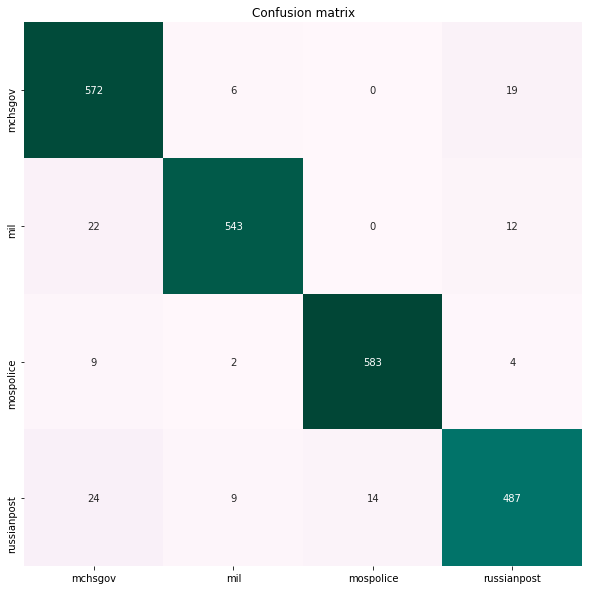

In [0]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(test['source'], test['tags_1']), annot=True, fmt="d", cbar=False, xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="PuBuGn")
plt.title("Confusion matrix")
plt.show()

Добавление лемматизации улучшило качество еще на 0.01, качество было хуже до момента добавления n-грамм

## Задание 6 [3 балла]. Continious bag of words
Для baseline решения мы использовали обычное представление текста в виде мешка слов. Попробуйте использовать другие модели представления текста – например, в виде непрерывного мешка слов, то есть, в виде набора эмбеддингов. Для того, чтобы получить вектор текста попробуйте:
* усреднить все эмбеддинги слов, входящих в этот текст
* усреднить все эмбеддинги слов, входящих в этот текст с $tf-idf$ весами
* использовать любую модель эмбеддинга документа.

Используйте любую модель эмбеддингов по вашему вкусу. 


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
from gensim.corpora import *
from gensim.models import  *
from gensim.models.doc2vec import TaggedDocument

In [0]:
train_tagged = train.apply(
    lambda x: TaggedDocument(words=x['lemmatized'].split(), tags=[x.source]), axis=1)
test_tagged = test.apply(
    lambda x: TaggedDocument(words=x['lemmatized'].split(), tags=[x.source]), axis=1)

Distributed Bag of Words

In [0]:
model_d2v = Doc2Vec(dm=0, vector_size=300)
model_d2v.build_vocab([x for x in train_tagged.values])
model_d2v.train(shuffle([x for x in train_tagged.values]), total_examples=len(train_tagged.values), epochs=30)

In [0]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targ, reg = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targ, reg

In [0]:
y_train, X_train = vec_for_learning(model_d2v, train_tagged)
y_test, X_test = vec_for_learning(model_d2v, test_tagged)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [0]:
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy:   0.97


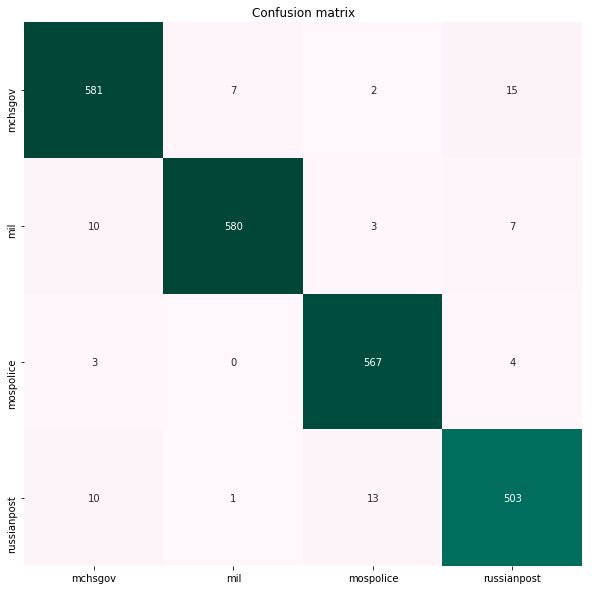

In [0]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="PuBuGn")
plt.title("Confusion matrix")
plt.show()

Качество такое же, как в случае с добавлением лемматизации и n-грамм

Word2Vec с усреднением ембеддингов

In [0]:
model = Word2Vec(train.lemmatized, size=300)
w2v = dict(zip(model.wv.index2word, model.wv.vectors))

In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec], axis = 0)
            for words in X
        ])

In [0]:
clf = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("clasifier", GradientBoostingClassifier())])

clf.fit(train.lemmatized, train.source)

Pipeline(memory=None,
         steps=[('word2vec vectorizer',
                 <__main__.MeanEmbeddingVectorizer object at 0x7fbe526275f8>),
                ('clasifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            presort='au

In [0]:
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy:   0.97


tf-idf с весами

In [0]:
from collections import defaultdict

In [0]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec], axis=0)
                for words in X
            ])

In [0]:
clf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("clasifier", GradientBoostingClassifier())])

clf.fit(train.lemmatized, train.source)

Pipeline(memory=None,
         steps=[('word2vec vectorizer',
                 <__main__.TfidfEmbeddingVectorizer object at 0x7fbe524c17f0>),
                ('clasifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            presort='a

In [0]:
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy:   0.97


Взвешивание особо не помогло

## Задание 7 [2 балла]. fastText

Используйте ```fastText``` в режиме классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
#!pip install fasttext

     |████████████████████████████████| 81kB 5.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/73/8e/5d/ecb50b90adaab5868ae1d8df180f31e55e85c2f055aaf2fb35
Successfully built fasttext


In [0]:
import fasttext
with open('fasttext', 'w') as f:
    for i in train.index:
        text = str(train.final[i])
        tag = str(train.source[i])
        f.write(text + ' ' + '+++' + tag + '\n')

In [0]:
fasttext_clas = fasttext.supervised('fasttext', 'model', label_prefix='+++')
fasttext = fasttext_clas.predict([text for text in test.final])

In [0]:
# макро-усреднение
print("Precision: {0:6.2f}".format(precision_score(test['source'], fasttext, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(test['source'], fasttext, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(test['source'], fasttext, average='macro')))

print("...")
# микро-усреднение
print("Precision: {0:6.2f}".format(precision_score(test['source'], fasttext, average='micro')))
print("Recall: {0:6.2f}".format(recall_score(test['source'], fasttext, average='micro')))
print("F1-measure: {0:6.2f}".format(f1_score(test['source'], fasttext, average='micro')))

print("...")
# accuracy
print("Accuracy: {0:6.2f}".format(accuracy_score(test['source'], fasttext)))

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


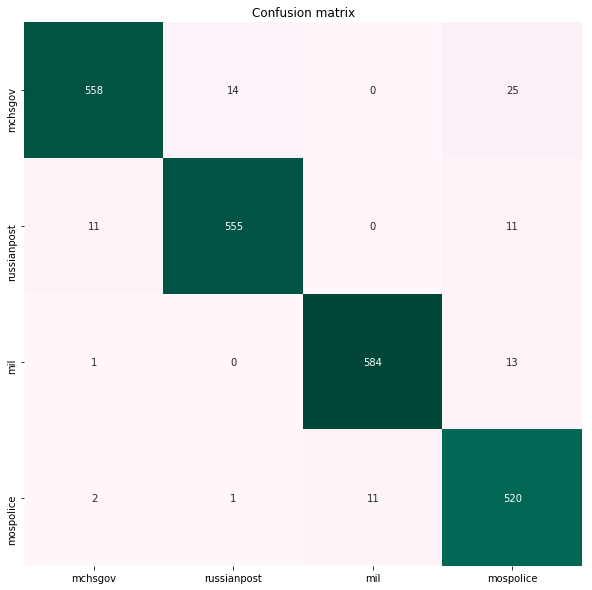

In [0]:
l = ['mchsgov', 'russianpost', 'mil', 'mospolice']
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(test.source, fasttext), annot=True, fmt="d", cbar=False, xticklabels=l, yticklabels=l, cmap="PuBuGn")
plt.title("Confusion matrix")
plt.show()

fasttext показал по всем метрикам 0.96, чуть хуже, чем было достигнуто предыдущими операциями

## Задание 8 [4 балла]. CNN

Реализуйте модель Kim et al (2014) для решения задачи классификации с помощью CNN. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix).
Ссылка: Kim Y. Convolutional Neural Networks for Sentence Classification. 2014

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

In [0]:
TEXT_LENGTH = 36898
VOCABULARY_SIZE = 250000
EMBEDDING_DIM = 300
DIMS = 250
MAX_FEATURES = 5000
batch_size = 64

nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 10

In [0]:
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train.lemmatized)
tokenizer

In [0]:
sequences = tokenizer.texts_to_sequences(train.lemmatized)
X_train = tokenizer.sequences_to_matrix(sequences, mode='count')
sequences = tokenizer.texts_to_sequences(test.lemmatized)
X_test = tokenizer.sequences_to_matrix(sequences, mode='count')
print('First seq:',sequences[0])
print('First doc:',X_train[0])

In [0]:
le = LabelEncoder()
le.fit(train.source.unique())
y_train = np_utils.to_categorical(le.transform(train.source), 4)
y_test = np_utils.to_categorical(le.transform(test.source), 4)
y_true = le.transform(test.source)
print(y_train[0])

[0. 1. 0. 0.]


In [0]:
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE,
                            EMBEDDING_DIM,
                            input_length=TEXT_LENGTH,
                            trainable=True))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Train on 9220 samples, validate on 2306 samples
Epoch 1/10
9220/9220 [==============================] - 17s 2ms/step - loss: 0.4827 - acc: 0.8198 - val_loss: 0.1708 - val_acc: 0.9454
Epoch 2/10
9220/9220 [==============================] - 14s 2ms/step - loss: 0.0896 - acc: 0.9768 - val_loss: 0.1259 - val_acc: 0.9644
Epoch 3/10
9220/9220 [==============================] - 14s 2ms/step - loss: 0.0401 - acc: 0.9910 - val_loss: 0.1237 - val_acc: 0.9701
Epoch 4/10
9220/9220 [==============================] - 14s 2ms/step - loss: 0.0234 - acc: 0.9945 - val_loss: 0.1402 - val_acc: 0.9666
Epoch 5/10
9220/9220 [==============================] - 14s 2ms/step - loss: 0.0160 - acc: 0.9958 - val_loss: 0.1607 - val_acc: 0.9662
Epoch 6/10
9220/9220 [==============================] - 14s 2ms/step - loss: 0.0147 - acc: 0.9961 - val_loss: 0.1674 - val_acc: 0.9644
Epoch 7/10
9220/9220 [==============================] - 14s 2ms/step - loss: 0.0105 - acc: 0.9973 - val_loss: 0.1785 - val_acc: 0.9640
Epoch 8

              precision    recall  f1-score   support

     mchsgov       0.96      0.95      0.95       605
         mil       0.99      0.97      0.98       600
   mospolice       0.98      0.96      0.97       574
 russianpost       0.90      0.96      0.93       527

    accuracy                           0.96      2306
   macro avg       0.96      0.96      0.96      2306
weighted avg       0.96      0.96      0.96      2306



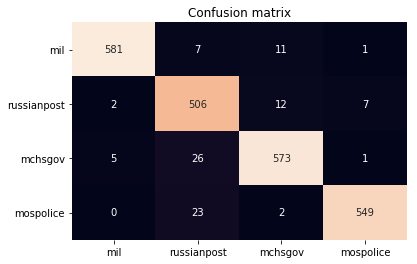

In [0]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_true, y_pred))
labels = test.source.unique()
#y_true = le.inverse_transform(y_true)
#y_pred = le.inverse_transform(y_pred)
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

сверточная нейронная сеть показала приблизительно такие же показатели по всем метрикам

## Задание 9 [4 + 2 балла]. RNN

(4 балла)Используйте ```RNN``` (BLSTM с какими-то признаками и пулинг поверх) для решения задачи текстовой классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix).

За дополнительные 2 балла добавьте в модель символьные признаки - CharCNN или CharRNN

In [0]:
TEXT_LENGTH = 36898
VOCABULARY_SIZE = 250000
EMBEDDING_DIM = 300
DIMS = 250
MAX_FEATURES = 5000
batch_size = 64

nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 5

In [0]:
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train.lemmatized)
tokenizer

In [0]:
sequences = tokenizer.texts_to_sequences(train.lemmatized)
X_train = tokenizer.sequences_to_matrix(sequences, mode='count')
sequences = tokenizer.texts_to_sequences(test.lemmatized)
X_test = tokenizer.sequences_to_matrix(sequences, mode='count')

In [0]:
print('First seq:',sequences[0])
print('First doc:',X_train[0])

First seq: [2263, 12, 3644, 754, 2127, 3160, 3644, 5, 1295, 2710, 246, 1418, 3201, 77, 412, 3350, 169, 458]
First doc: [0. 1. 0. ... 0. 0. 0.]


In [0]:
le = LabelEncoder()
le.fit(train.source.unique())
y_train = np_utils.to_categorical(le.transform(train.source), 4)
y_test = np_utils.to_categorical(le.transform(test.source), 4)
y_true = le.transform(test.source)
print(y_train[0])

[0. 1. 0. 0.]


In [0]:
model = Sequential()
model.add(Dense(128, input_shape=(MAX_FEATURES,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,  validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 8298 samples, validate on 922 samples
Epoch 1/5
8298/8298 [==============================] - 1s 133us/step - loss: 0.3154 - acc: 0.9463 - val_loss: 0.1401 - val_acc: 0.9696
Epoch 2/5
8298/8298 [==============================] - 1s 77us/step - loss: 0.0871 - acc: 0.9843 - val_loss: 0.1127 - val_acc: 0.9729
Epoch 3/5
8298/8298 [==============================] - 1s 77us/step - loss: 0.0506 - acc: 0.9902 - val_loss: 0.1101 - val_acc: 0.9751
Epoch 4/5
8298/8298 [==============================] - 1s 75us/step - loss: 0.0351 - acc: 0.9937 - val_loss: 0.1115 - val_acc: 0.9729
Epoch 5/5
8298/8298 [==============================] - 1s 76us/step - loss: 0.0261 - acc: 0.9952 - val_loss: 0.1099 - val_acc: 0.9740


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       605
           1       1.00      0.98      0.99       600
           2       0.97      0.99      0.98       574
           3       0.96      0.96      0.96       527

    accuracy                           0.98      2306
   macro avg       0.98      0.98      0.98      2306
weighted avg       0.98      0.98      0.98      2306



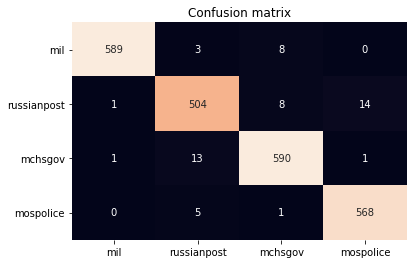

In [0]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_true, y_pred))
labels = test.source.unique()
y_true = le.inverse_transform(y_true)
y_pred = le.inverse_transform(y_pred)
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

0.98! довольно неплохо, попробуем LSTM

LSTM

In [0]:
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [0]:
print('максимальная длина в словах - ',df['count'].max())
TEXT_LENGTH = 1619

максимальная длина в словах -  1619


In [0]:
from keras.preprocessing import sequence
sequences = tokenizer.texts_to_sequences(train.lemmatized)
X_train = sequence.pad_sequences(sequences, maxlen=TEXT_LENGTH)
sequences = tokenizer.texts_to_sequences(test.lemmatized)
X_test = sequence.pad_sequences(sequences, maxlen=TEXT_LENGTH)

In [0]:
max_review_length = max([len(el) for el in X_train])
top_words = 3000

In [0]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 1619, 32)          96000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 404       
Total params: 149,604
Trainable params: 149,604
Non-trainable params: 0
_________________________________________________________________
None
Train on 9220 samples, validate on 2306 samples
Epoch 1/3
9220/9220 [==============================] - 347s 38ms/step - loss: 0.3871 - acc: 0.8347 - val_loss: 0.1951 - val_acc: 0.9533
Epoch 2/3
9220/9220 [==============================] - 346s 38ms/step - loss: 0.1472 - acc: 0.9544 - val_loss: 0.0764 - val_acc: 0.9750
Epoch 3/3
9220/9220 [==============================] - 346s 37ms/step - los

              precision    recall  f1-score   support

     mchsgov       0.97      0.97      0.97       605
         mil       0.99      0.98      0.98       600
   mospolice       0.97      0.99      0.98       574
 russianpost       0.96      0.95      0.96       527

    accuracy                           0.97      2306
   macro avg       0.97      0.97      0.97      2306
weighted avg       0.97      0.97      0.97      2306



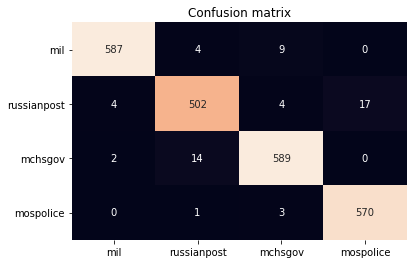

In [0]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_true, y_pred))
labels = test.source.unique()
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

0.97, приблизительно также

 добавим сверточный слой + пулинг

In [0]:
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 1619, 32)          96000     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1619, 32)          3104      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 809, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 404       
Total params: 152,708
Trainable params: 152,708
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
9220/9220 [==============================] - 163s 18ms/step - loss: 0.3769 - acc: 0.8411
Epoch 2/3
9220/9220 [===========

              precision    recall  f1-score   support

     mchsgov       0.96      0.97      0.96       605
         mil       0.99      0.97      0.98       600
   mospolice       0.97      1.00      0.99       574
 russianpost       0.97      0.95      0.96       527

    accuracy                           0.97      2306
   macro avg       0.97      0.97      0.97      2306
weighted avg       0.97      0.97      0.97      2306



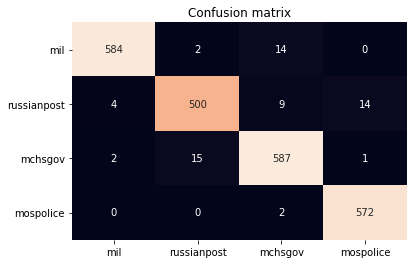

In [0]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_true, y_pred))
labels = test.source.unique()
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

добавление сверточного слоя и пулинга не сильно помогло, качество примерно такое же

## Задание 10 [8 баллов]. ULMFit

Используйте ```ULMFit``` для решения задачи классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [0]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [0]:
data_lm = TextLMDataBunch.from_df(train_df = X_train, valid_df = X_test, path = '')
data_clas = TextClasDataBunch.from_df(path = "", train_df = train.lemmatized, valid_df = test.lemmatized, vocab=data_lm.train_ds.vocab, bs=32)

AttributeError: ignored

## Конец
Выполните какие-то из предыдущих заданий. Для всех заданий, кроме задания 1 требуется вычислить метрику accuracy метода.

Подведите итоги и проведите сравнение всех использованных методов. Какой из них показался вам лучше и почему?

**NB!** Задание обязательное вне зависимости от того, сколько из предыдущих пунктов вы выполнили, и дополнительных баллов не дает.


Для получения полной оценки за NLP-часть достаточно набрать **20 баллов**.

Показались лучше нейросети, так как ими было достигнуто лучшее качество, но все остальные методы, кроме правил, достигли качества >0.95, что также весьма неплохо

# Правила сдачи 

1. Домашняя работа должна быть выполнена в ipynb-тетрадке.
2. Сделанную тетрадку нужно отправить ассистенту (ссылка на контакты будет в вики).
3. Задание выполняется индивидуально.
4. Все вычисления должны быть снабжены пояснениями!
5. Дедлайн – 10 июня в 10.00.
